## **Objective:**
To analyze demographic and work-related factors influencing income classification (>50K vs ≤50K) 

## Dataset Description

The Adult Income dataset contains demographic and employment-related attributes used to classify individuals into income categories (>50K vs ≤50K).

Features include age, education, occupation, workclass, and other socioeconomic indicators.


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
data = pd.read_csv('Adult.csv')  #Read file
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [68]:
data.head(10) #Display Top 10 Rows of the Dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [69]:
data.tail(10)  #Display Last 10 Rows of the Dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [70]:
data.shape #Find Shape of Our Dataset (Number of Rows and Numbers of Columns)

(48842, 15)

In [71]:
print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 48842
Number of columns 15


In [72]:
data.info() #Getting Information about our Dataset eg. Total Numbers Rows, Total Numbers of Columns, Datatypes of Each Column and Memory Requirement

<class 'pandas.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  str  
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  str  
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  str  
 6   occupation       48842 non-null  str  
 7   relationship     48842 non-null  str  
 8   race             48842 non-null  str  
 9   gender           48842 non-null  str  
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  str  
 14  income           48842 non-null  str  
dtypes: int64(6), str(9)
memory usage: 5.6 MB


In [73]:
data.isnull().sum(axis=1) #Check Null Values from Dataset

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    0
Length: 48842, dtype: int64

<Axes: >

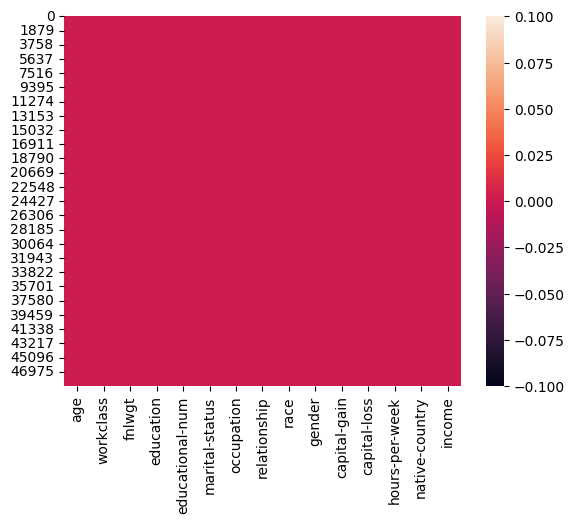

In [74]:
sns.heatmap(data.isnull()) #Null value Visualization by heatmap

In [75]:
data.isin(['?']).sum() #Finding question Mark in Dataset

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [76]:
data['workclass'] = data['workclass'].replace('?', np.nan)
data['occupation'] = data['occupation'].replace('?', np.nan)
data['native-country'] = data['native-country'].replace('?', np.nan) #Replacing Question Mark with NaN from Columns

In [77]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [78]:
data.isnull().sum()  #Verifying Null in Dataset

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [79]:
data.isin(['?']).sum()  #No Question Marks in the Dataset

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<Axes: >

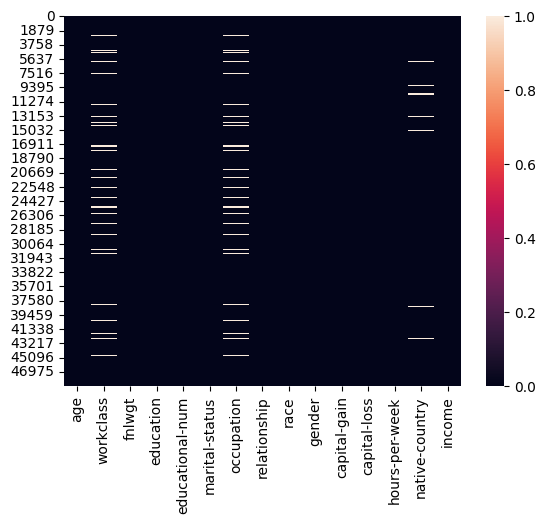

In [80]:
sns.heatmap(data.isnull()) #Visualization of Null Values by heatmap

In [81]:
per_missing = data.isnull().sum()*100/len(data) #Finding Missing Values in Percentage

In [82]:
per_missing

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [83]:
data.dropna(how = 'any', inplace = True) #Dropping Missing Values from Dataset

In [84]:
data.shape #Verifying (Dropping the missing values)

(45222, 15)

In [85]:
dup = data.duplicated().any() #Checking Duplicate Data in Dataset

In [86]:
print('Are there any duplicated values in data', dup)

Are there any duplicated values in data True


In [87]:
data = data.drop_duplicates()  #Dropping Duplicate Datas

In [88]:
data.shape

(45175, 15)

In [89]:
data.describe() #Get Overall Statistics of the Datasets

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [90]:
data.describe(include='all')  #Get Overall Statistics of the Complete Datasets

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Education and Educational-num are same

In [91]:
data['education'].unique()

<StringArray>
[        '11th',      'HS-grad',   'Assoc-acdm', 'Some-college',
         '10th',  'Prof-school',      '7th-8th',    'Bachelors',
      'Masters',      '5th-6th',    'Assoc-voc',          '9th',
    'Doctorate',         '12th',      '1st-4th',    'Preschool']
Length: 16, dtype: str

In [92]:
data['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

In [93]:
data = data.drop(['educational-num', 'capital-gain', 'capital-loss'], axis = 1) #Dropping the columns Educational-num, Capital-gain and Capital-loss

# Univariate Analysis
### Distribution of Age in the Dataset

<Axes: >

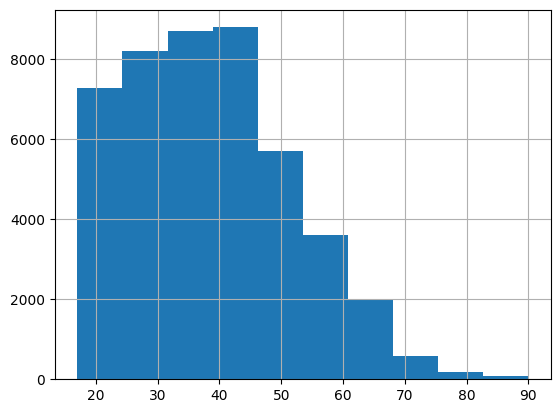

In [94]:
data['age'].hist() #Histogram of Age Column

### Age Distribution and Range Analysis

In [95]:
sum((data['age']>=17) & (data['age']<=48)) #Without Between Method

34858

In [96]:
sum(data['age'].between(17, 48)) #With Between Method

34858

### The Distribution of Workclass Column

<Axes: >

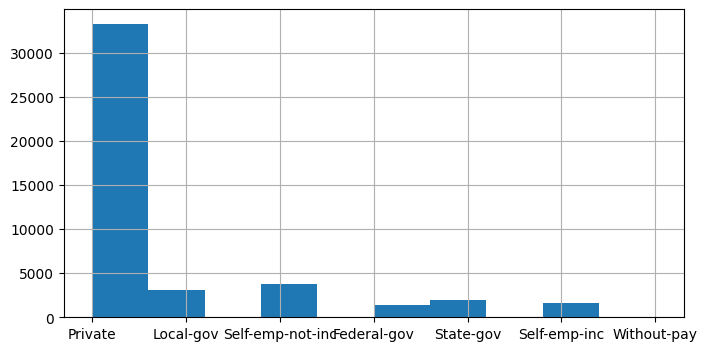

In [97]:
plt.figure(figsize=(8, 4))
data['workclass'].hist()

### Education Level Analysis

In [98]:
F1=data['education']=='Bachelors'
F2=data['education']=='Masters'

In [99]:
len(data[F1|F2]) #Total Numbers of Persons having Bachelors or Masters Degree

10072

# Bivariate Analysis

### Relation between Age and Income

<Axes: xlabel='income', ylabel='age'>

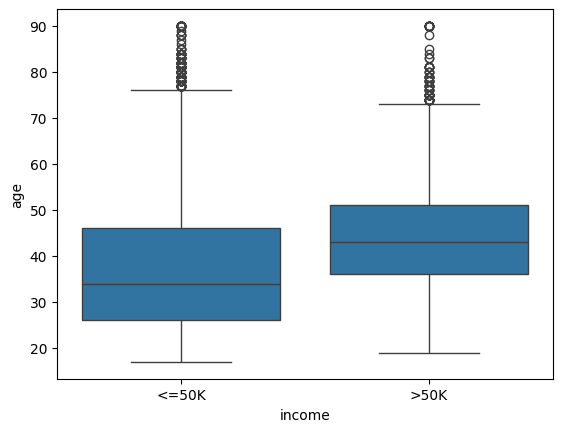

In [100]:
sns.boxplot(x='income', y='age', data = data)

### Binary Encoding of Targeted Variables

In [101]:
data['income'].value_counts() #Unique values in Income Columns

income
<=50K    33973
>50K     11202
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='count'>

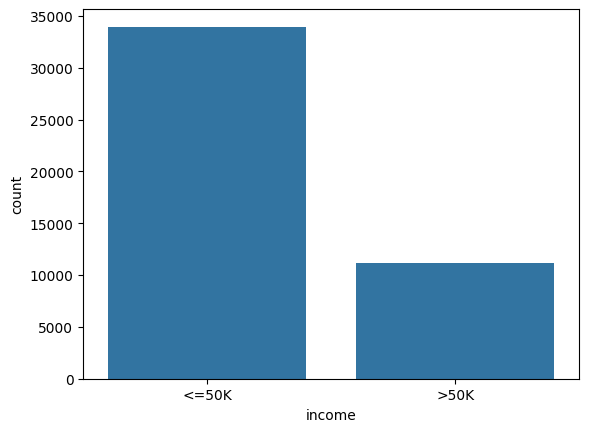

In [102]:
sns.countplot(x ='income', data=data) #Countplot of Income

In [103]:
def income (sal):
    if sal == '<=50K':
        return 0
    else:
        return 1

In [104]:
data['Encoded salary'] = data['income'].apply(income) #Added Encoded Salary Column to Dataset

In [105]:
data.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Encoded salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,0
7,63,Self-emp-not-inc,104626,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K,1
8,24,Private,369667,Some-college,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K,0
9,55,Private,104996,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K,0
10,65,Private,184454,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1
11,36,Federal-gov,212465,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K,0


In [106]:
data.replace(to_replace = ['<=50K', '>50K'], value = [0, 1], inplace = True)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Encoded salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0,0
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1,1
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0,0
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0,0


### Workclass Getting The Highest Income

In [107]:
data.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income, dtype: object

## Key Insights

- The income classes exhibit noticeable imbalance
- Education level shows strong association with income category
- Certain occupations and workclass groups dominate higher income levels
- Age and working hours display observable trends with income
